<a href="https://colab.research.google.com/github/SGRGit/gwOsc/blob/Main/SineGaussianDataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
base_dir = "drive/My Drive/Colab Notebooks/SignalProc/Iteration 3"
seta = 'Signal'
setb = 'Noise'

data_dir = os.path.join(base_dir, 'data')
seta_data_dir = os.path.join(data_dir, seta)
seta_data_fnnames = os.listdir(seta_data_dir)

setb_data_dir = os.path.join(data_dir, setb)
setb_data_fnnames = os.listdir(setb_data_dir)

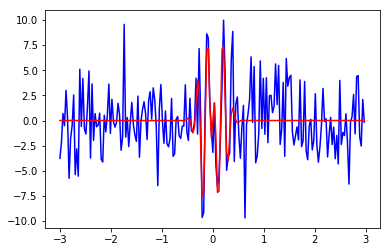

In [27]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

t = np.linspace(-3, 3, 2 * 100, endpoint=False)
i, q, e = np.array(100*t)*signal.gausspulse(t, fc = 5 , retquad=True, retenv=True)
n = (1/20)*np.array(60)*np.random.randn(len(t))
xn = i + n
plt.plot(t, xn, 'b', t, i, 'r')

In [28]:
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
fs = 100

alpha = np.linspace(1, 5, num = 500)
neu = np.linspace(5, 20, num = 500)

t = np.linspace(-3, 3, 2 * 100, endpoint=False)
signal_amp = np.array(100*t)
#noise_amp = np.array(60)


def plot_spectrogram_sig(sig, fs):
  from scipy import signal
  freqs, times, spectrogram = signal.spectrogram(sig)
  plt.imshow(spectrogram, aspect='auto')
  plt.ylabel('Frequency band')
  plt.xlabel('Time window')
  plt.title('Spectrogram for Signal : Iteration %d' %a)
  plt.savefig(os.path.join(seta_data_dir,'SPG for Signal%d'%a))
  plt.close()
  
  
def plot_spectrogram_ns(noise, fs):
  from scipy import signal
  freqs, times, spectrogram = signal.spectrogram(noise)
  plt.imshow(spectrogram, aspect='auto')
  plt.ylabel('Frequency band')
  plt.xlabel('Time window')
  plt.title('Spectrogram for Noise : Iteration %d' %a)
  plt.savefig(os.path.join(setb_data_dir,'SPG for Noise%d'%a))
  plt.close()

for a in range(0, 500, 1):
  i, q, e = signal_amp*signal.gausspulse(t, fc=1*alpha[a], retquad=True, retenv=True)
  n = (1/neu[a])*np.array(60)*np.random.randn(len(t)) 
  xn = i + n # Noise+Signal
  plot_spectrogram_sig(xn, fs)

for a in range(0, 500, 1):
  n = (1/neu[a])*np.array(60)*np.random.randn(len(t)) 
  plot_spectrogram_ns(n, fs)

/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  .format(nperseg, input_length))
